In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from utils import ICV_frame_differencing_first, ICV_frame_differencing_previous

In [5]:
# Task A: Write a function that performs pixel-by-pixel frame differencing using, as reference frame, the first 
# frame of an image sequence
# Perform pixel-by-pixel frame differencing using the first frame as the reference frame

# Read in video from Dataset C and determine total amount of frames to process
frames = cv2.VideoCapture("../../data/DatasetC.mpg")

# Determine the fps and duration of the video
fps = frames.get(cv2.CAP_PROP_FPS)
total_frames = int(frames.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames/fps

# Exit the program if the frames cannot be read
if not frames.isOpened():
    print('Unable to open')
    exit(0)

# An index will be incremented for each image captured and used for the naming convention of saving the image
index = 0

# Create a dictionary to capture color metrics
ref_frame = []
frame_metrics = []
images = []


# Loop through the frames and every second save the image, create the color histogram, and capture the color metrics
for i in range(total_frames):

    # Break if the frame is not read
    ret, frame = frames.read()
    if frame is None:
        break
    
    # Capture an image every second (or every 30 frames per second)
    if i % fps == 0:
        
        # Save the frame as an image for visual comparison
        cv2.imwrite('../../output/cw5/video_out/frame' + str(index) + '.png', frame)

        # Convert to Gray Scale to reduce noise
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Store images for processing background
        images.append(frame)

        # Store the first frame as the reference frame
        if index == 0:
            ref_frame = frame

        # Perform frame differencing using the first reference frame
        result = frame - ref_frame
        # r, g, b = result[:,:,0].flatten(), result[:,:,1].flatten(), result[:,:,2].flatten()
        # result = r + g + b
        frame_metrics.append(result)

        # Save the frame as an image for visual comparison
        cv2.imwrite('../../output/cw5/frame_diff/frameA' + str(index) + '.png', result)
        
        # Update reference frame and index
        ref_frame = frame
        index += 1

In [6]:
# Task B: Write a function that performs pixel-by-pixel frame differencing using, as reference frame, the first 
# frame of an image sequence
# Perform pixel-by-pixel frame differencing using the first frame as the reference frame

# Read in video from Dataset C and determine total amount of frames to process
frames = cv2.VideoCapture("../../data/DatasetC.mpg")

# Determine the fps and duration of the video
fps = frames.get(cv2.CAP_PROP_FPS)
total_frames = int(frames.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames/fps

# Exit the program if the frames cannot be read
if not frames.isOpened():
    print('Unable to open')
    exit(0)

# An index will be incremented for each image captured and used for the naming convention of saving the image
index = 0

# Create a dictionary to capture color metrics
ref_frame = []
frame_metrics = []
images = []


# Loop through the frames and every second save the image, create the color histogram, and capture the color metrics
for i in range(total_frames):

    # Break if the frame is not read
    ret, frame = frames.read()
    if frame is None:
        break
    
    # Capture an image every second (or every 30 frames per second)
    if i % fps == 0:
        
        # Save the frame as an image for visual comparison
        cv2.imwrite('../../output/cw5/video_out/frameB' + str(index) + '.png', frame)

        # Convert to Gray Scale to reduce noise
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Update reference frame and index
        ref_frame = frame

        # Store images for processing background
        images.append(frame)

        # Perform frame differencing using the first reference frame
        result = frame - ref_frame
        # r, g, b = result[:,:,0].flatten(), result[:,:,1].flatten(), result[:,:,2].flatten()
        # result = r + g + b
        frame_metrics.append(result)

        # Save the frame as an image for visual comparison
        cv2.imwrite('../../output/cw5/frame_diff/frameA' + str(index) + '.png', result)
        
        index += 1

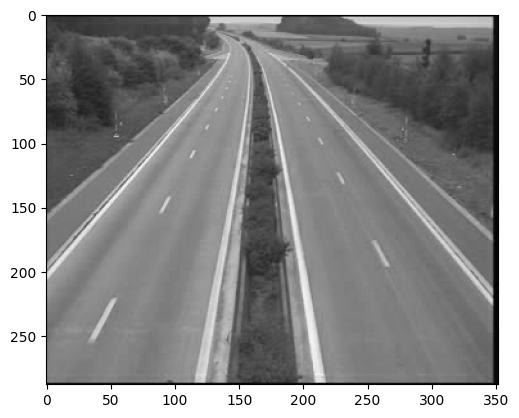

In [7]:
# Task C: Write a function that generates a reference frame (background)
background_frame = np.median(images, axis=0).astype(np.uint8)

plt.imshow(background_frame, cmap="gray")


In [ ]:
# Task D: Write a function that counts the number of moving objects in each frame of a sequence.
result = images[0] - background_frame

hist_res = result.flatten()
plt.imshow(result, cmap="gray")
